<a href="https://colab.research.google.com/github/akhilabojja/projects/blob/main/Brainwave_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving TPB.xlsx to TPB.xlsx


In [5]:
filename = list(uploaded.keys())[0]
df = pd.read_excel(filename)
print(df.head())

                                               Tweet                id  \
0  id ligula suspendisse ornare consequat lectus ...  6672567125560790   
1  euismod scelerisque quam turpis adipiscing lor...  8265456713789040   
2  leo rhoncus sed vestibulum sit amet cursus id ...   281117346800427   
3  aenean lectus pellentesque eget nunc donec qui...  7758025943576750   
4  sed accumsan felis ut at dolor quis odio conse...  6131837006729570   

                     time  impressions  engagements  engagement rate  \
0  2020-06-30 21:09 +0000        365.0          4.0         0.010959   
1  2020-06-30 17:14 +0000        184.0          2.0         0.010870   
2  2020-06-30 16:59 +0000       2644.0         46.0         0.017398   
3  2020-06-30 13:55 +0000        301.0          3.0         0.009967   
4  2020-06-30 12:13 +0000        528.0          0.0         0.000000   

   retweets  replies  likes  user profile clicks  ...  hashtag clicks  \
0       0.0        0    1.0                  2.0 

In [6]:
df

,Tweet,id,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,...,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements
0,id ligula suspendisse ornare consequat lectus ...,6672567125560790,2020-06-30 21:09 +0000,365.0,4.0,0.010959,0.0,0,1.0,2.0,...,0,1,0,0,0,0,0,0,0.0,0.0
1,euismod scelerisque quam turpis adipiscing lor...,8265456713789040,2020-06-30 17:14 +0000,184.0,2.0,0.010870,0.0,0,2.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,leo rhoncus sed vestibulum sit amet cursus id ...,281117346800427,2020-06-30 16:59 +0000,2644.0,46.0,0.017398,1.0,1,17.0,0.0,...,0,23,0,0,0,0,0,0,354.0,1.0
3,aenean lectus pellentesque eget nunc donec qui...,7758025943576750,2020-06-30 13:55 +0000,301.0,3.0,0.009967,0.0,1,2.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
4,sed accumsan felis ut at dolor quis odio conse...,6131837006729570,2020-06-30 12:13 +0000,528.0,0.0,0.000000,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,donec vitae nisi nam ultrices libero non matti...,1927221295610470,2020-10-01 12:29 +0000,233.0,6.0,0.025751,0.0,0,2.0,2.0,...,0,1,0,0,0,0,0,0,136.0,1.0
1177,sapien varius ut blandit non interdum in ante ...,4816192197908330,2020-10-01 12:25 +0000,213.0,4.0,0.018779,0.0,0,1.0,1.0,...,0,0,0,0,0,0,0,0,26.0,2.0
1178,porttitor lacus at turpis donec posuere metus ...,4892493509085580,2020-10-01 12:24 +0000,248.0,5.0,0.020161,0.0,1,3.0,0.0,...,0,1,0,0,0,0,0,0,0.0,0.0
1179,pellentesque volutpat dui maecenas tristique e...,268636566144228,2020-10-01 12:24 +0000,765.0,11.0,0.014379,0.0,3,1.0,0.0,...,0,7,0,0,0,0,0,0,0.0,0.0


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


Tweet                   0
id                      0
time                    0
impressions             2
engagements             2
engagement rate         2
retweets                1
replies                 0
likes                   0
user profile clicks     0
url clicks              0
hashtag clicks          0
detail expands          0
permalink clicks        0
app opens               0
app installs            0
follows                 0
email tweet             0
dial phone              0
media views            12
media engagements      13
dtype: int64


In [10]:
df = df.dropna()

In [14]:
pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
def analyze_sentiment(tweet):
    score = analyzer.polarity_scores(tweet)
    if score['compound'] > 0.05:
        return 'Positive'
    elif score['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Tweet'].apply(analyze_sentiment)


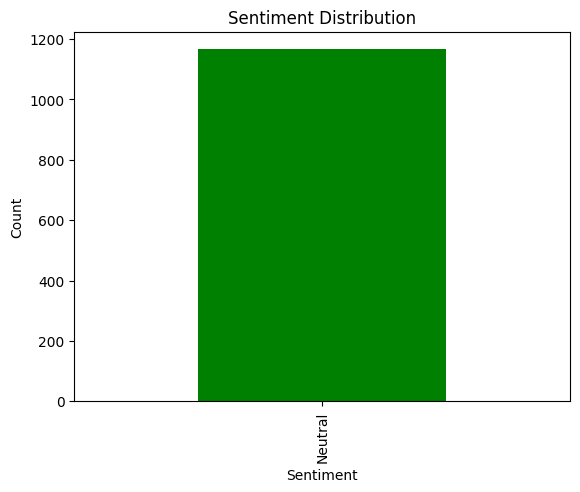

In [17]:
import matplotlib.pyplot as plt

sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


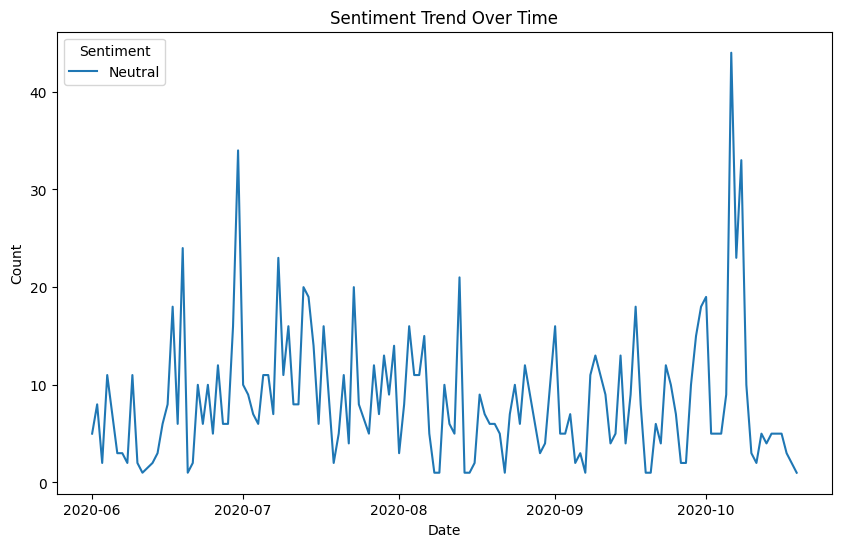

In [18]:
df['time'] = pd.to_datetime(df['time'])
sentiment_trend = df.groupby(df['time'].dt.date)['Sentiment'].value_counts().unstack()
sentiment_trend.plot(kind='line', figsize=(10, 6))
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


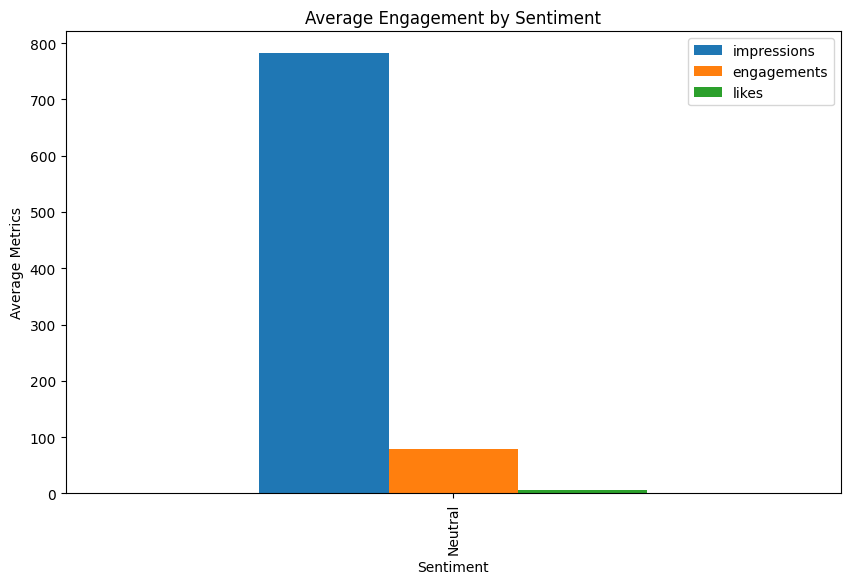

In [19]:
sentiment_engagement = df.groupby('Sentiment')[['impressions', 'engagements', 'likes']].mean()
sentiment_engagement.plot(kind='bar', figsize=(10, 6))
plt.title('Average Engagement by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Metrics')
plt.show()


In [22]:
print("Positive Text Length:", len(positive_text))
print("Negative Text Length:", len(negative_text))


Positive Text Length: 0
Negative Text Length: 0


In [23]:
print(df['Sentiment'].value_counts())


Sentiment
Neutral    1166
Name: count, dtype: int64


In [24]:
df['Tweet'] = df['Tweet'].fillna('Unknown')
df = df[df['Tweet'].str.strip() != '']


In [25]:
if positive_text.strip():
    positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Positive Word Cloud')
    plt.show()
else:
    print("No positive tweets available to generate a word cloud.")

if negative_text.strip():
    negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Negative Word Cloud')
    plt.show()
else:
    print("No negative tweets available to generate a word cloud.")


No positive tweets available to generate a word cloud.
No negative tweets available to generate a word cloud.
